###### Non-Negative Matrix Factorization(NMF)
NMF works very similar to PCA, In PCA components that were orthogonol to each other and that explain preserve as much variance as possible were extracted. In NMF the components and the co-effecients should be non-negative.

NMF decomposes multivariate data by creating a user-defined number of features. Each feature is a linear combination of the original attribute set; the coefficients of these linear combinations are non-negative.

NMF can be applied to data where each feature is non-negative. Bascically this method is helpful for data that is created as the addition of several independent sources.

Given an non-negative matrix V, it finds non-negative matrix factors W and H such that,

$$V \approx W H$$

Ex: Audio track of multiple speakers or music from multiple instruments. 

In those kind of situations NMF will be able to identify actual components that make up the combined data. Components obtained from NMF are more meaningful and interpretable over the components obtained in PCA.

Since componets obtained in PCA will be a mix of negative and positive values, its hard to interpret them as the few components cancel each other. And the sign of each component is determined arbitarily.

Also we need to ensure that our data is positive for NMF to be able to operate on the data. In other means the data which lies relative to origin (0, 0) actually matters for NMF. 

Refer to <a href="https://papers.nips.cc/paper/1861-algorithms-for-non-negative-matrix-factorization.pdf">this</a> paper for detailed explanation of NMF implementation and proof.

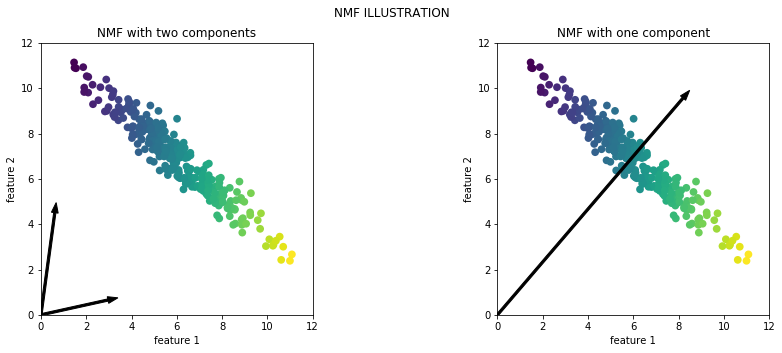

In [2]:
# Example featuring components identified by NMF
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_nmf_illustration()
plt.suptitle("NMF ILLUSTRATION")
plt.show()

In the left image two components have been identified and it's very clear that all the data points can be written  as non-negative combination of of those two components. If there are enough components to perfectly reconstruct the data (as many components are there are features), the algorithm will choose directions that point towards the extremes of the data.

And if we choose only as single component then NMF creates a component that points towards the mean of the data. And hence reducing the number of components not only removes directions but also changes all other directions. 

In addition to that components obtained from NMF are not ordered in any specific way. Hence all components play equal role.


Text(0.5,0.98,'some_faces')

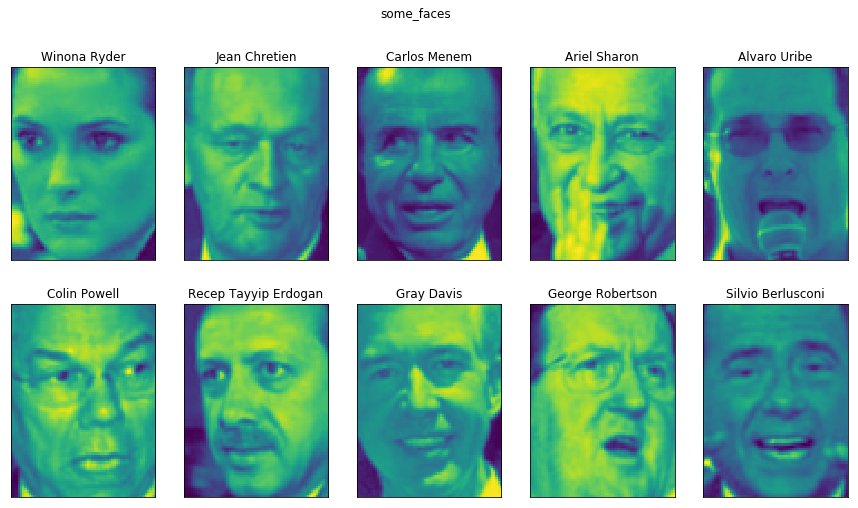

In [4]:
# Applying NMF for face dataset
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
plt.suptitle("some_faces")

# mglearn.plots.plot_nm_faces()

In [5]:
# There are 3023 images, each 87 x 65 pixels large, belonging to 62 different people
print(people.images.shape)
print(len(people.target_names))


(3023, 87, 65)
62


In [7]:
from collections import Counter
print([str(people.target_names[key]) + " " + str(val) for key, val in Counter(people.target).items()])

['Winona Ryder 24', 'Jean Chretien 55', 'Carlos Menem 21', 'Ariel Sharon 77', 'Alvaro Uribe 35', 'Colin Powell 236', 'Recep Tayyip Erdogan 30', 'Gray Davis 26', 'George Robertson 22', 'Silvio Berlusconi 33', 'George W Bush 530', 'Nestor Kirchner 37', 'Bill Clinton 29', 'Donald Rumsfeld 121', 'Hugo Chavez 71', 'Andre Agassi 36', 'Gerhard Schroeder 109', 'Pete Sampras 22', 'Arnold Schwarzenegger 42', 'Jennifer Capriati 42', 'Serena Williams 52', 'John Ashcroft 53', 'Lindsay Davenport 22', 'Rudolph Giuliani 26', 'Jeremy Greenstock 24', 'Angelina Jolie 20', 'Tom Ridge 33', 'Luiz Inacio Lula da Silva 48', 'Tony Blair 144', 'Alejandro Toledo 39', 'Vladimir Putin 49', 'Amelie Mauresmo 21', 'Roh Moo-hyun 32', 'Lleyton Hewitt 41', 'Jacques Chirac 52', 'Jennifer Lopez 21', 'Jiang Zemin 20', 'Gloria Macapagal Arroyo 44', 'Kofi Annan 32', 'David Beckham 31', 'Hamid Karzai 22', 'Jack Straw 28', 'Mahmoud Abbas 29', 'Jose Maria Aznar 23', 'Jennifer Aniston 21', 'Igor Ivanov 20', 'Laura Bush 41', 'Jua

Hence for few people the number of images is more. Which makes the data a bit skewed. Hence we consider only 50 images  per person at max.

In [11]:
import numpy as np
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

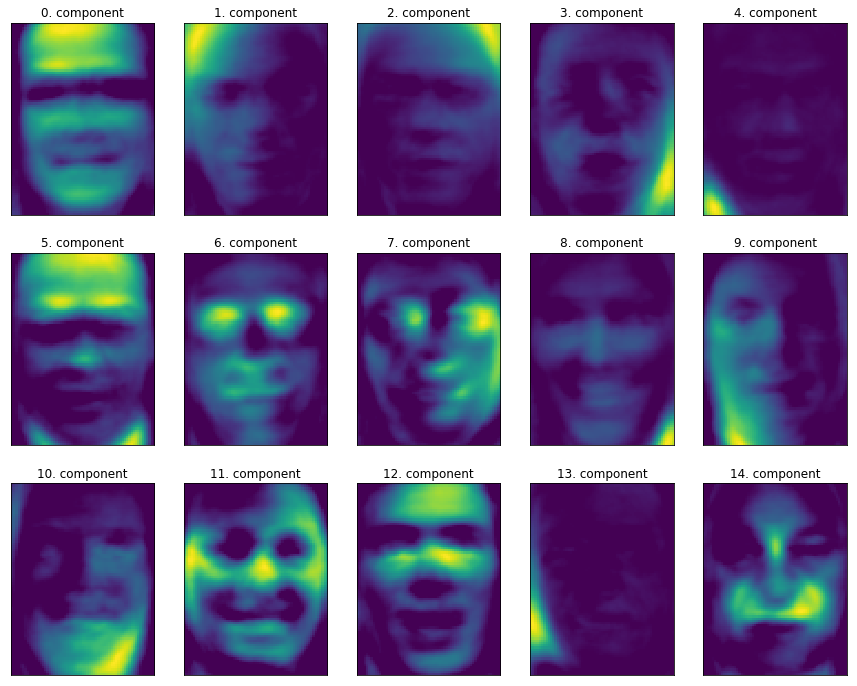

In [15]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("%d. component" % i)
plt.show()

These components are all positive, and so resemble prototypes of faces much more. For example, one can clearly see that component 3 shows a face rotated somewhat to the right, while component 7 shows a face somewhat rotated to the left. Let’s look at the images for which these components are particularly strong

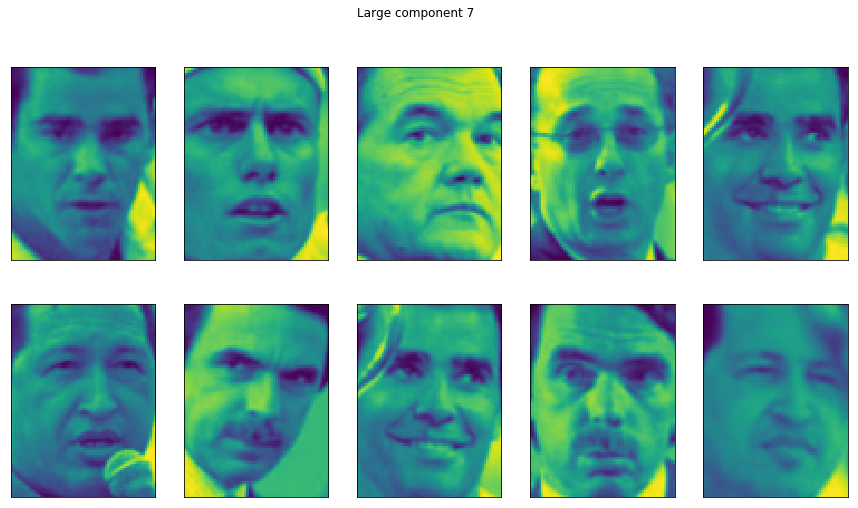

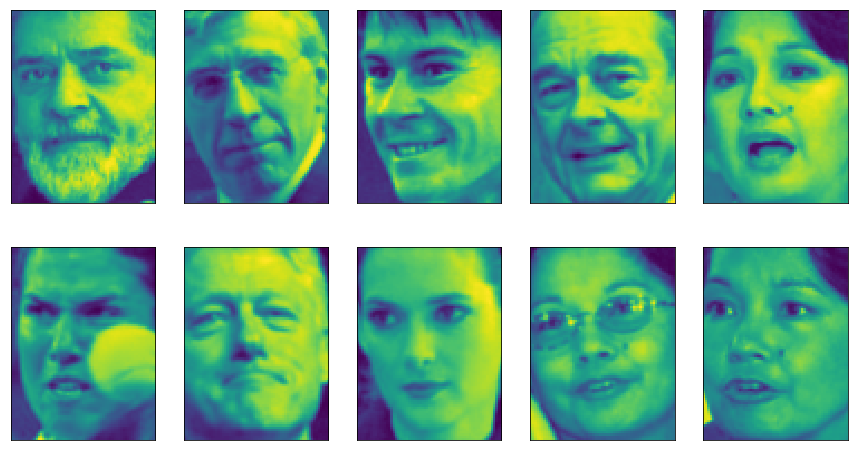

In [22]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

As expected, faces that have a high coefficient for component 3 are faces looking to the right, while faces with a high component 7 are looking to the left. As mentioned above, extracting patterns like these works best for data with additive structure, including audio, gene expression data, and text data.